## EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("../data/churn_data.csv")
data.shape

(505207, 13)

### UNDERSTANDING DATASET

In [4]:
data.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,98181,101075.0,25.0,Female,54.0,17.0,8.0,19.0,Premium,Annual,363.00,15.0,1.0
1,235946,242319.0,18.0,Male,44.0,20.0,8.0,16.0,Premium,Annual,281.82,13.0,1.0
2,10931,10932.0,49.0,Female,26.0,2.0,1.0,16.0,Premium,Annual,329.00,11.0,0.0
3,313606,320721.0,46.0,Male,50.0,22.0,4.0,0.0,Basic,Annual,683.90,12.0,0.0
4,8429,8438.0,47.0,Male,37.0,19.0,3.0,18.0,Premium,Annual,321.00,3.0,1.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         505207 non-null  int64  
 1   CustomerID         505206 non-null  float64
 2   Age                505206 non-null  float64
 3   Gender             505206 non-null  object 
 4   Tenure             505206 non-null  float64
 5   Usage Frequency    505206 non-null  float64
 6   Support Calls      505206 non-null  float64
 7   Payment Delay      505206 non-null  float64
 8   Subscription Type  505206 non-null  object 
 9   Contract Length    505206 non-null  object 
 10  Total Spend        505206 non-null  float64
 11  Last Interaction   505206 non-null  float64
 12  Churn              505206 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 50.1+ MB


In [11]:
# NULL VALUES
data.isna().sum()

Unnamed: 0           0
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [12]:
# DUPLICATE VALUES
data.duplicated().sum()

np.int64(0)

### CLEANING

In [5]:
# 1. Remove Unnamed: 0 column
working_data = data.drop("Unnamed: 0", axis=1)
# 2. Convert datatypes of some column from float to int
columns_float_to_int = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency','Support Calls', 'Payment Delay', 'Last Interaction', 'Churn']
working_data[columns_float_to_int] = working_data[columns_float_to_int].astype('int')
# 3. Remove null entries
working_data = working_data.dropna().reset_index(drop=True)

In [82]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  int64  
 1   Age                505206 non-null  int64  
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  int64  
 4   Usage Frequency    505206 non-null  int64  
 5   Support Calls      505206 non-null  int64  
 6   Payment Delay      505206 non-null  int64  
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  int64  
 11  Churn              505206 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 46.3+ MB


### DATA EXPLORATION

In [13]:
numeric_features = ['Age', 'Tenure', 'Usage Frequency','Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features = ['Gender', 'Subscription Type', 'Contract Length'] 

UNIVARIATE ANALYSIS

In [43]:
# CATEGORICAL FEATURES
working_data.describe(include=['object','category'])

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


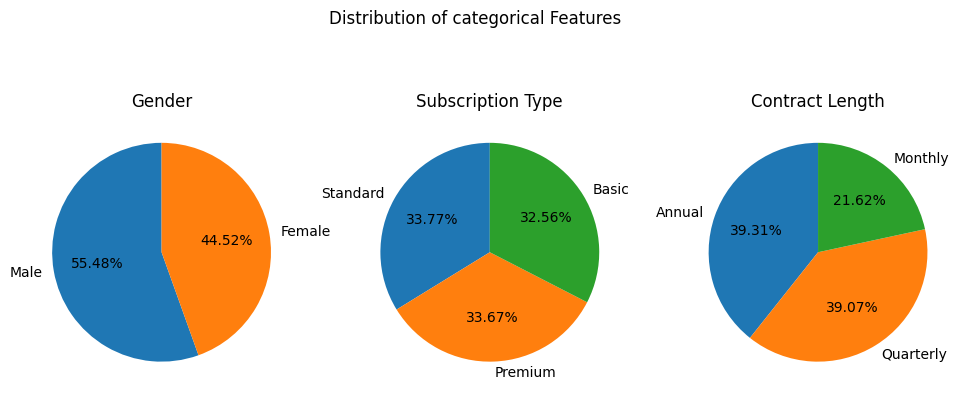

In [ ]:
plt.figure(figsize = (12,5))
for idx, feature in enumerate(categorical_features):
    counts = working_data[feature].value_counts()
    plt.subplot(1,3,idx+1)
    plt.pie(counts, labels = counts.index, autopct='%1.2f%%', startangle=90)
    plt.title(feature)
plt.suptitle("Distribution of categorical Features") 
plt.show()

INSIGHTS: <br>
The customer base consists of 11% more males than females. <br>
All subscription types are equally popular among customers. <br>
Customers show a clear preference for Annual or Quarterly contracts, which are chosen 18% more frequently than Monthly contracts.

In [44]:
# NUMERICAL FEATURES
working_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


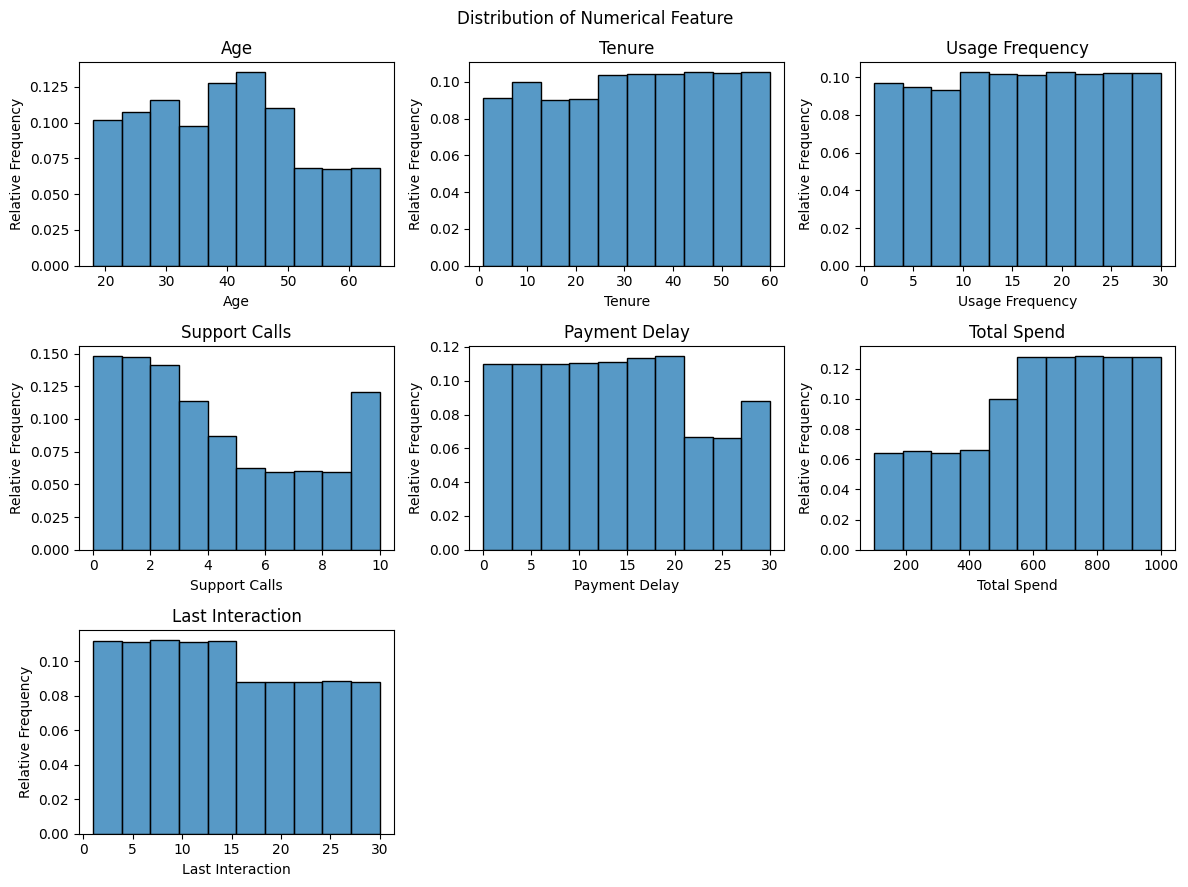

In [36]:
plt.figure(figsize=(12,9))
for idx, feature in enumerate(numeric_features):
    plt.subplot(3,3,idx+1)
    sns.histplot(working_data[feature], bins = 10, stat='probability') 
    plt.xlabel(feature)
    plt.ylabel("Relative Frequency")
    plt.title(feature)
plt.suptitle("Distribution of Numerical Feature") 
plt.tight_layout()
plt.show() 

INSIGHTS: <br>
1. The majority of customers fall in the 30–50 age range, with fewer customers in younger (20–30) or older (60+) age groups. <br>
2. Tenure is uniformly distributed, indicating a balanced representation of customers across various lengths of service with the company. <br>
3. The usage frequency is evenly distributed, suggesting that customers engage with the service at varying levels. <br>
4. Most customers make 0–3 support calls, but there is a noticeable group with 9–10 calls, potentially signaling dissatisfaction or frequent service issues. <br>
5. Payment delays are most common in the 15–20 day range, with a decline beyond 25 days. <br>
6. Spending is right-skewed, with most customers in the higher-spending range (600–1000 units), indicating a significant proportion of high-value customers. <br>
7. The time since the last interaction is evenly distributed, reflecting no clear trend in customer recency patterns.

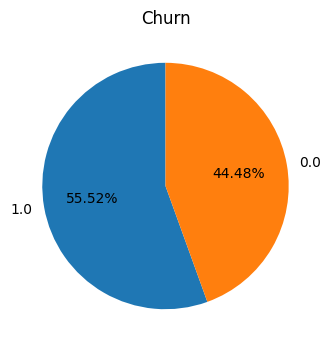

In [39]:
# TARGET
plt.figure(figsize = (4,4))
counts = working_data["Churn"].value_counts()
plt.pie(counts, labels = counts.index, autopct='%1.2f%%', startangle=90)
plt.title("Churn")
plt.show() 

BIVARIATE ANALYSIS

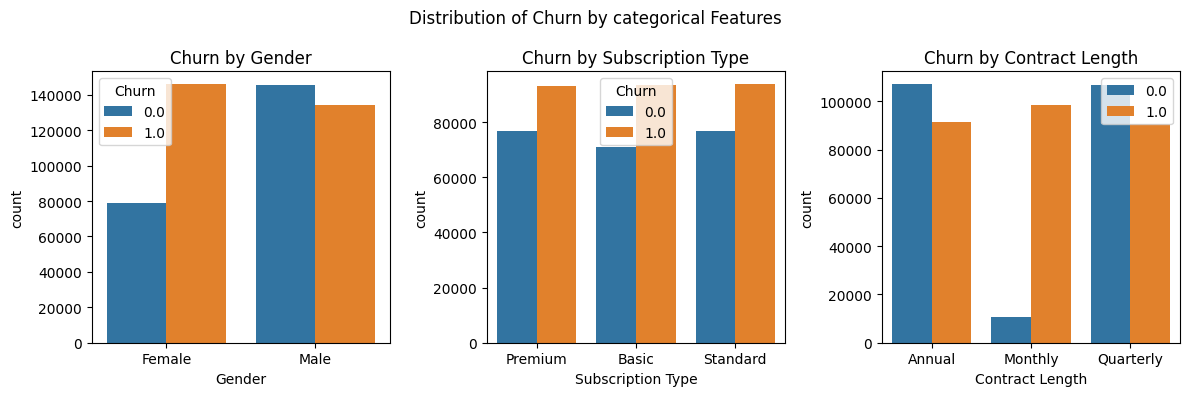

In [50]:
# CATEGORICAL FEATURES
plt.figure(figsize = (12,4))
for idx, feature in enumerate(categorical_features):
    plt.subplot(1,3,idx+1)
    sns.countplot(data=working_data, x=feature, hue='Churn')
    plt.title(f"Churn by {feature}")
plt.suptitle("Distribution of Churn by categorical Features") 
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show() 

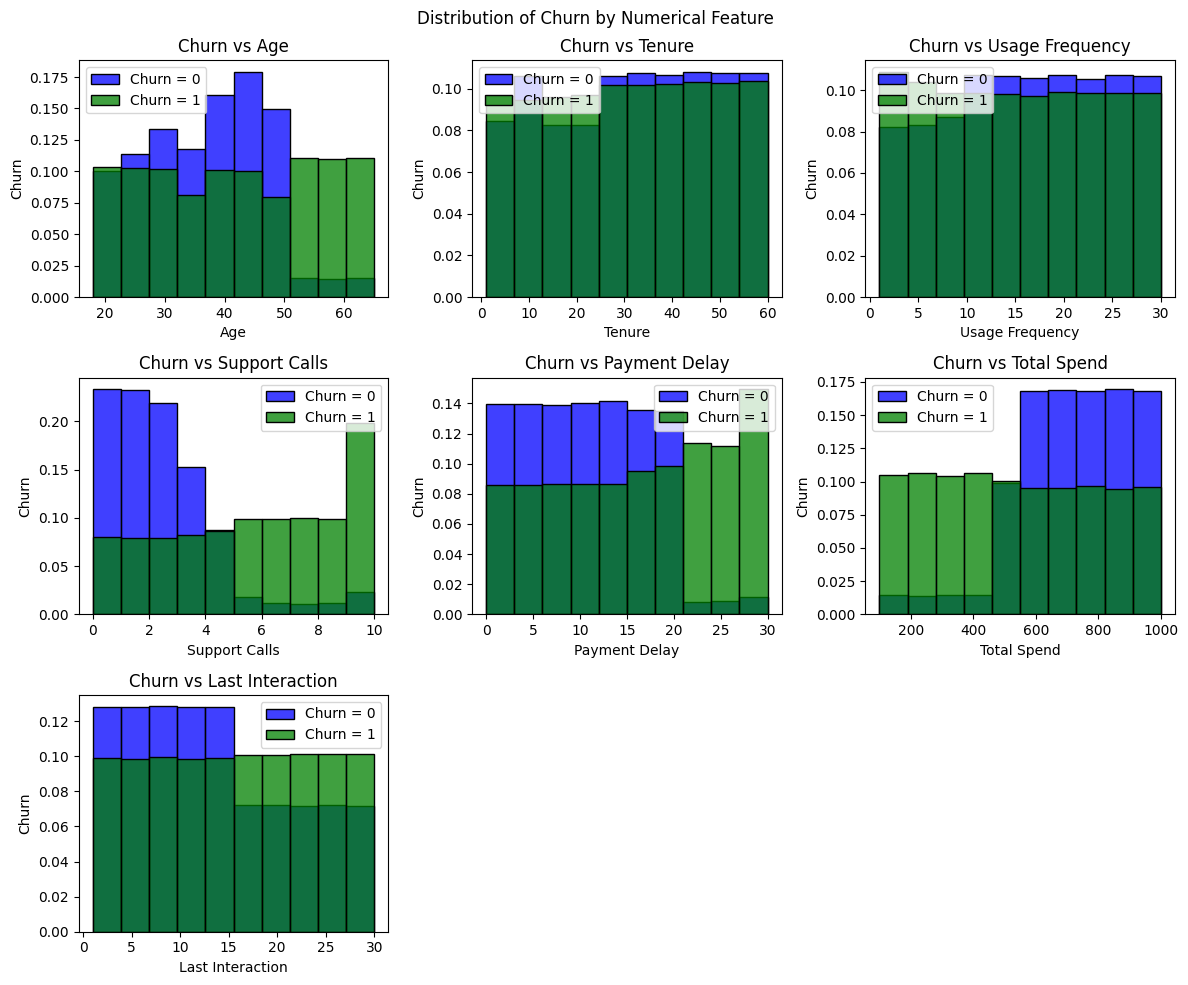

In [60]:
# NUMERICAL FEATURES
plt.figure(figsize=(12,10))
for idx, feature in enumerate(numeric_features):
    plt.subplot(3,3,idx+1)
    sns.histplot(data=working_data[working_data.Churn == 0], x=feature, bins = 10, stat='probability', color='blue')
    sns.histplot(data=working_data[working_data.Churn == 1], x=feature, bins = 10, stat='probability', color='green') 
    plt.xlabel(feature) 
    plt.ylabel("Churn")
    plt.title(f"Churn vs {feature}")
    plt.legend(["Churn = 0", "Churn = 1"])
plt.suptitle("Distribution of Churn by Numerical Feature") 
plt.tight_layout()
plt.show() 

<Axes: >

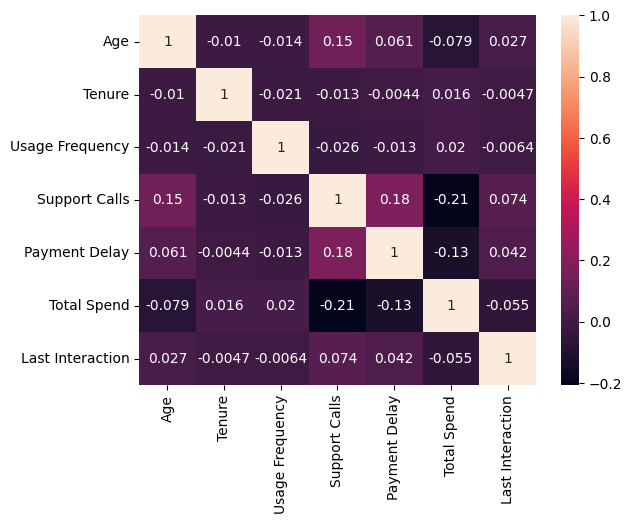

In [61]:
# CORRELATIONS BETWEEN FEATURES
sns.heatmap(working_data[numeric_features].corr(), annot=True)